<a href="https://colab.research.google.com/github/Chammar37/TensorFlow-Practice/blob/main/Classification_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification Work - Binary vs Multi classification

#In this notebook were going to learn how to write nerual networks for classification problem

#A classifcation is where you try to clasify something as one thing or antoher
* Binary clasification
* Multiclass Clasification
* Multilable clasification

##Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

#Check out features
X.shape
y.shape
#Check labels
# y[:10]



(1000,)

Our data is hard to understand, lets visualize

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


Visualize with plot

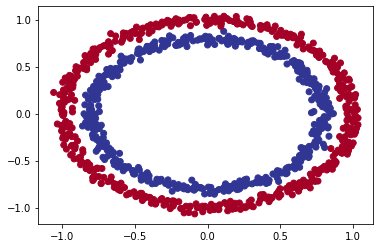

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

#Input and Output Shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

#Plot Decision Boundary helper function

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

# Steps in Modelling

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# # 1. Createa model

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1)),
])

# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(1000, 1000, 2)),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(1, activation="Sigmoid")
# ])
#Compile
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

#Fit
model.fit(tf.expand_dims(X,axis=-1), y, epochs=200)




In [ ]:
model.evaluate(X,y)

32/32 [==============================] - 1s 8ms/step - loss: 4.6865 - accuracy: 0.4980


[4.686453342437744, 0.49799999594688416]

#Since we are working on a binary classifcation problem, and our model is getting ~50% accuracy... its show that it is essentially guessing (equivalent)

In [ ]:
#Set seetd
tf.random.set_seed(42)

#Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1, activation="relu"),
    # tf.keras.layers.Dense(1, activation="Sigmoid")
])

#Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#Fit model

model_2.fit(X,y, epochs=100)


#Improving our model

Need to add more tricks to improve our model.

Common way to improve a deep model:

* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learnng rate
* Fitting on more data
* Fitting for longer


In [ ]:
tf.random.set_seed(42)

#Create a model
model_3 = tf.keras.Sequential([
    # tf.keras.layers.Dense(100),
    # tf.keras.layers.Dense(10),
    # tf.keras.layers.Dense(1),

    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit

model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

##Missing piece: Non Linearity
What if we want our model to learn a non-linear data ? Data that does not show a linear line when graphed. The data above is just that (x, y)
###Next we will show how we can show our models to learn non-linearly

In [ ]:
import tensorflow as tf


In [ ]:
#THIS IS WRONG, STILL LINEAR

#Set the random seed
tf.random.set_seed(42)

#Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

#In the udemy videos, he made models for each non-linear activation , trying to replicate from https://playground.tensorflow.org
Im not doing that lol. <br>
Next is doing that with ReLu. 4 hidden layers. It looks like each hidden layer acts a line, so if we have 4 hidden layers we have 4 separate lines in our learning model. <br> What this means exactly? <br> As the data is shown as a circle when drawn in the graph , we can draw a 4 sided figure around the the data we are trying to predict <br>
For ex red plots result and are mapped to blue dots. so we are trying to predict blue dots given the red dots (shown below)

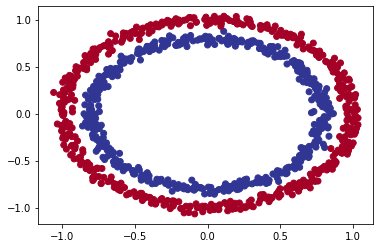

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

###Replicate this
https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.36722&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
<br> Missing activation function in the output layer

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),

])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_6.fit(tf.expand_dims(X, axis=-1),y, epochs=250)

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5043


[0.6931278109550476, 0.5043437480926514]

In [ ]:
from keras.api._v2.keras.layers import Flatten
tf.random.set_seed(42)


# model_7 = tf.keras.Sequential()
# model_7.add(tf.keras.layers.Dense(4, input_shape=(None, 1), activation="relu"))
# model_7.add(tf.keras.layers.Dense(4, activation="relu"))
# model_7.add(tf.keras.layers.Dense(1, activation="sigmoid"))


#Equivalent ^ (not tested)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    # tf.keras.layers.flatten( )
    #add activation function in output layer. Used for binary classifcation
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])


# model_7.summary()
model_7.fit(X, y, epochs=250)

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.9990


[0.022464986890554428, 0.9990000128746033]

ReLu and Sigmoid NOT LINEAR

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [ ]:
#Lets try to see what Sigmoid function is
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

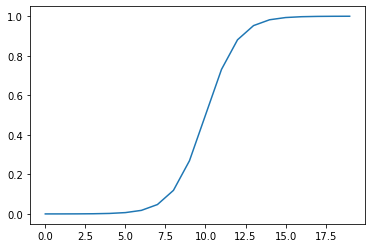

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
#Lets try to see what Sigmoid function is
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

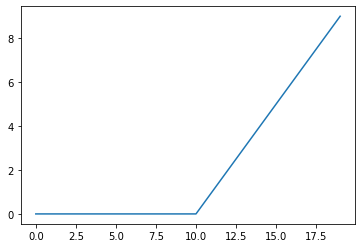

In [ ]:
plt.plot(relu(A))

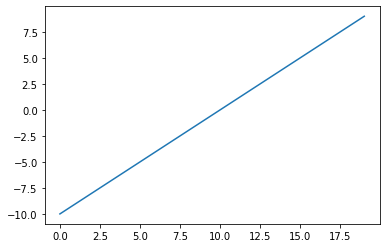

In [ ]:
#Lets try to see what Linear function is (should be standard)

tf.keras.activations.linear(A)

#Does Linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

#We can see no change. linear activation function doesnt change our
#input data, therefore output data stays the same doesnt change anything
#Where as non-linear function helps deduce patterns in non-linear data




#Evaluating and Improving our Classification Model

In [ ]:
#Create training and testing data sets to evaluate our model better
#(Test it at on data its not never seen)

#Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Recreate model to fit on training data and evalute on test data

tf.random.set_seed(42)

model_8 = tf.keras.Sequential()

model_8.add(tf.keras.layers.Dense(4, activation="relu"))
model_8.add(tf.keras.layers.Dense(4, activation="relu"))
model_8.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#Compile
model_8.compile(loss="binary_crossentropy", #tells model how wrong those patterns
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #higher the learning rate, the more the model will update/change, learning rate tells how often to improve the model
                #optimizers tells the model how it should improve
                metrics=["accuracy"])
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 8ms/step - loss: 0.6968 - accuracy: 0.5225
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6738 - accuracy: 0.5962
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.5675
Epoch 4/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6549 - accuracy: 0.6525
Epoch 5/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6461 - accuracy: 0.6012
Epoch 6/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6323 - accuracy: 0.6300
Epoch 7/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6159 - accuracy: 0.7063
Epoch 8/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6017 - accuracy: 0.7250
Epoch 9/25
25/25 [==============================] - 0s 6ms/step - loss: 0.5826 - accuracy: 0.7800
Epoch 10/25
25/25 [==============================] - 0s 7ms/step - loss: 0.5541 - accuracy: 0.7625
Epoch 11/25
25/25 [

In [ ]:
#Evaluate model on test data set
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 1s 5ms/step - loss: 0.0715 - accuracy: 0.9900


[0.07148763537406921, 0.9900000095367432]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


<function matplotlib.pyplot.show(close=None, block=None)>

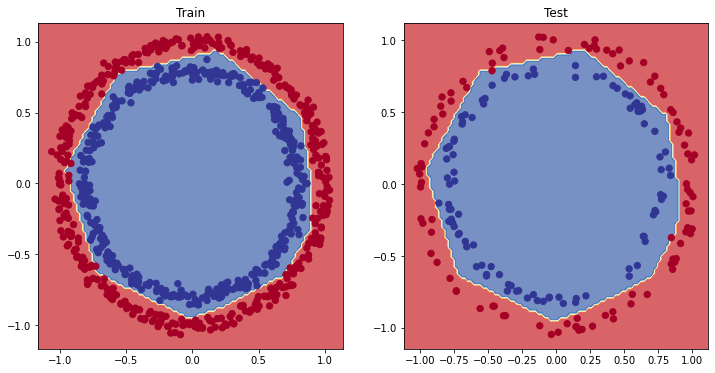

In [ ]:
#Plot the decision boundaries for train and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show